In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

import cv2
import numpy as np
import pandas as pd


# Fetch video you want to annotate

In [2]:
cap = cv2.VideoCapture("/Volumes/Extreme SSD/C02_170622120000.mp4")

ret,frame = cap.read()

video = input("Enter the video name")

Enter the video nameC02_170622120000.mp4


# Track object 

In [12]:
class Track:
    
    def __init__(self):
        self.trajectory = []
        
        
    def get_tracks(self):
        return self.tracks
    
    def get_id(self):
        return self.id
    
    def add_detection(self,data):
        self.trajectory.append(data)
        
    def remove_detection(self):
        self.trajectory.pop()
        


# Give the BeeID you want to start annotating

In [162]:
f_num = 0
track = Track()

# This cell when executed will open a window outside of the browser where you'll see the current frame plotted. All you have to do is click on the center of the bee and it will be annotated and added in the Track object

<IPython.core.display.Javascript object>


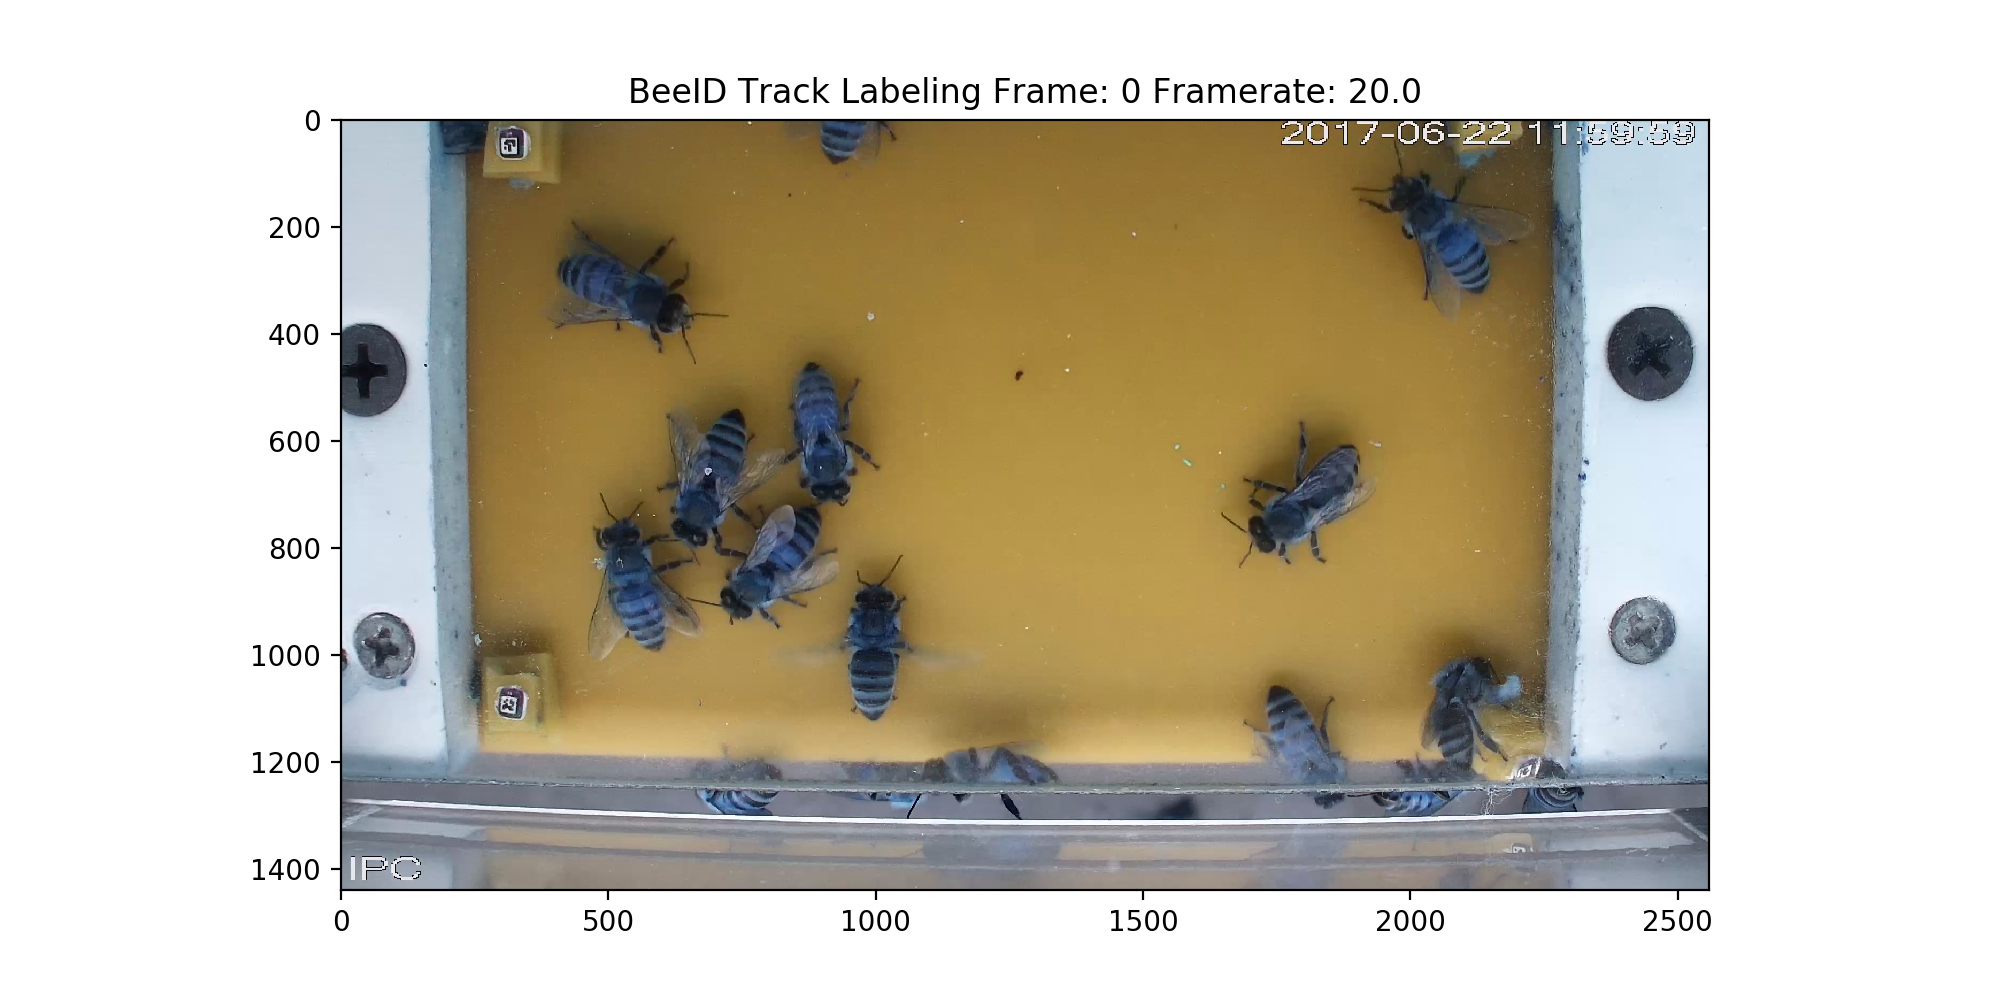

ValueError: list.remove(x): x not in list

In [209]:
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import HBox,VBox


fig, ax = plt.subplots(figsize=(10,5))

frame = frame[...,::-1]


plt.title('BeeID Track Labeling Frame: '+str(f_num) + " Framerate: "+ str(cap.get(cv2.CAP_PROP_FPS)))

ax.imshow(frame[...,::-1])

done = False



start_over = widgets.Button(description = 'Start Over')   
next_frame = widgets.Button(description = 'Next Frame')  
prev_frame = widgets.Button(description = 'Prev Frame')  
label = widgets.Label("ID Bee")
text = widgets.Text()
                      
start_over.on_click(startover_clicked)
next_frame.on_click(next_frame_clicked)
prev_frame.on_click(prev_frame_clicked)


text.on_submit(handle_submit)



left_box = VBox([label, text])
right_box = VBox([start_over, next_frame,prev_frame])
box_layout = widgets.Layout(display='flex',
                flex_flow='column',
                align_items='center',
                width='50%')
display(HBox([left_box, right_box],layout=box_layout))

cid = fig.canvas.mpl_connect('button_press_event', onclick)



In [6]:
frame_changed  = False
ann = None
temp = 0

frame_anotations = {}

def startover_clicked(arg):
    
    global f_num,ann
    
    f_num = 0
    
    cap.set(1,f_num)
    ret,frame = cap.read()
    frame = frame[...,::-1]
    
    if ann != None:
        ann.remove()
    
    ann = None
    
    ax.imshow(frame)
    plt.title('BeeID Track Labeling Frame: '+str(f_num) + " Framerate: "+  str(cap.get(cv2.CAP_PROP_FPS)))
    plt.draw()
    

def next_frame_clicked(arg):
    global f_num, ax, frame_changed,ann
    
    f_num+=1
    cap.set(1,f_num)
    
    ret,frame = cap.read()
    
    frame = frame[...,::-1]
    
    if not ret:
        done = True
        
    if ann != None:
        ann.remove()
    
    ann = None
        
    ax.imshow(frame)
    plt.title('BeeID Track Labeling Frame: '+str(f_num) + " Framerate: "+  str(cap.get(cv2.CAP_PROP_FPS)))
    plt.draw()

def prev_frame_clicked(arg):
    global f_num, ax, frame_changed,ann
    
    f_num-=1
    cap.set(1,f_num)
    
    ret,frame = cap.read()
    
    frame = frame[...,::-1]
    
    if not ret:
        done = True
        
    if ann != None:
        ann.remove()
    
    ann = None
        
    ax.imshow(frame)
    plt.title('BeeID Track Labeling Frame: '+str(f_num) + " Framerate: "+  str(cap.get(cv2.CAP_PROP_FPS)))
    plt.draw()
    
def handle_submit(sender):
    global c_id,text
    
    c_id = text.value
    
def onclick(event):
    
    global f_num, ax, ann,temp
    
    if temp != c_id:
        
        f_num+=1
        cap.set(1,f_num)

        ret,frame = cap.read()

        frame = frame[...,::-1]

        if not ret:
            done = True

        if ann != None:
            ann.remove()

        ann = None

        ax.imshow(frame)
        plt.title('BeeID Track Labeling Frame: '+str(f_num) + " Framerate: "+  str(cap.get(cv2.CAP_PROP_FPS)))
        plt.draw()

                
        print('xdata=%f, ydata=%f, frame=%f' %
              (event.xdata, event.ydata,f_num))

        track.add_detection({"x":event.xdata,"y":event.ydata,"frame":f_num,"bee_id":c_id})

        plt.plot(event.xdata,event.ydata)

        ann = plt.annotate(str(c_id), (event.xdata, event.ydata),color='white')
        
        temp = c_id

    else:
        ann.remove()
        track.remove_detection()
        temp=0

In [225]:
class GUI():
    
    def __init__(self,track,view):
        self.view = view
        self.track = track
        
        self.normal = False
        self.fast = True
        self.frame_changed = False
        
        self.start_over = widgets.Button(description = 'Start Over')   
        self.next_frame = widgets.Button(description = 'Next Frame')  
        self.prev_frame = widgets.Button(description = 'Prev Frame')  
       
        self.prev_annotation = widgets.Button(description = 'Prev Annot')  
        self.fast_mode = widgets.Button(description='Fast Mode')
        self.normal_mode = widgets.Button(description='Normal Mode')
        
        self.label = widgets.Label("ID Bee")
        self.text = widgets.Text()
        
    def start(self):
        
        self.start_over.on_click(self.startover_clicked)
        self.next_frame.on_click(self.next_frame_clicked)
        self.prev_frame.on_click(self.prev_frame_clicked)
        self.prev_annotation.on_click(self.prev_annotation_clicked)
        self.fast_mode.on_click(self.fast_mode_clicked)
        self.normal_mode.on_click(self.normal_clicked)
        
        self.text.on_submit(self.handle_submit)
    
        left_box = VBox([self.label, self.text])
        right_box = VBox([self.start_over, self.next_frame,self.prev_frame,self.prev_annotation])
        box_layout = widgets.Layout(display='flex',
                        flex_flow='row',
                        align_items='center',
                        width='50%')
        display(HBox([left_box,right_box],layout=box_layout))
        
        cid = self.view.fig.canvas.mpl_connect('button_press_event', self.on_click)

        
    def startover_clicked(self,arg):
        self.view.restart()
        
    def next_frame_clicked(self,arg):
        self.view.next_frame()
        
    def prev_frame_clicked(self,arg):
        self.view.prev_frame()
        
    def handle_submit(self,sender):
        self.view.current_id = self.text.value
        
    def fast_mode_clicked(self,arg):
        self.fast = True
        self.normal = False
        
    def normal_clicked(self,arg):
        self.normal = True
        self.fast = False
        
    def on_click(self,event):
        
        if self.fast:
            self.track.add_detection({"x":event.xdata,"y":event.ydata,"frame":self.view.frame_number,"bee_id":self.view.current_id})
            self.view.next_frame()
        else:
            self.track.add_detection({"x":event.xdata,"y":event.ydata,"frame":self.view.frame_number,"bee_id":self.view.current_id})

            
            
    def prev_annotation_clicked(self,arg):
        self.view.show_prev(track=self.track.trajectory[-1])
        
            
            


        

        

In [226]:
class View:
    def __init__(self,video,frame_number):
        self.current_id = None
        self.annotation = None
        self.frame_number = frame_number
        
        self.cap = cv2.VideoCapture(video)
        self.ret,self.frame = self.cap.read()
        
        self.fig, self.ax = plt.subplots(figsize=(10,5))

        plt.title('BeeID Track Labeling Frame: '+str(self.frame_number) + " Framerate: "+ str(self.cap.get(cv2.CAP_PROP_FPS)))

        self.ax.imshow(self.frame[...,::-1])
    
    def prev_frame(self):
        if self.frame_number == 0:
            pass
        else:
            self.frame_number -= 1
            
        self.refresh()
        
    def next_frame(self):
        
        self.frame_number += 1
        self.refresh()
        
    def show_prev(self,track):
        self.resfresh_annot(track)
    
    def restart(self):
        self.frame_number = 0
        self.refresh()
        
    def refresh(self):
        
        self.cap.set(1,self.frame_number)
        self.ret,self.frame = self.cap.read()
        self.frame = self.frame[...,::-1]
        
       
        if self.annotation != None:
            self.annotation.remove()

        self.ax.imshow(self.frame)
        plt.title('BeeID Track Labeling Frame: '+str(self.frame_number) + " Framerate: "+  str(self.cap.get(cv2.CAP_PROP_FPS)))
        plt.draw()
        
    def resfresh_annot(self,track):
        
        

        self.cap.set(1,self.frame_number)
        self.ret,self.frame = self.cap.read()
        self.frame = self.frame[...,::-1]
    
        self.ax.imshow(self.frame)
        plt.title('BeeID Track Labeling Frame: '+str(self.frame_number) + " Framerate: "+  str(self.cap.get(cv2.CAP_PROP_FPS)))
        plt.draw()
        plt.plot(track['x'], track['y'])

        self.annotation = plt.annotate(str(track['bee_id']), (track['x'], track['y']),color='white')
        

<IPython.core.display.Javascript object>


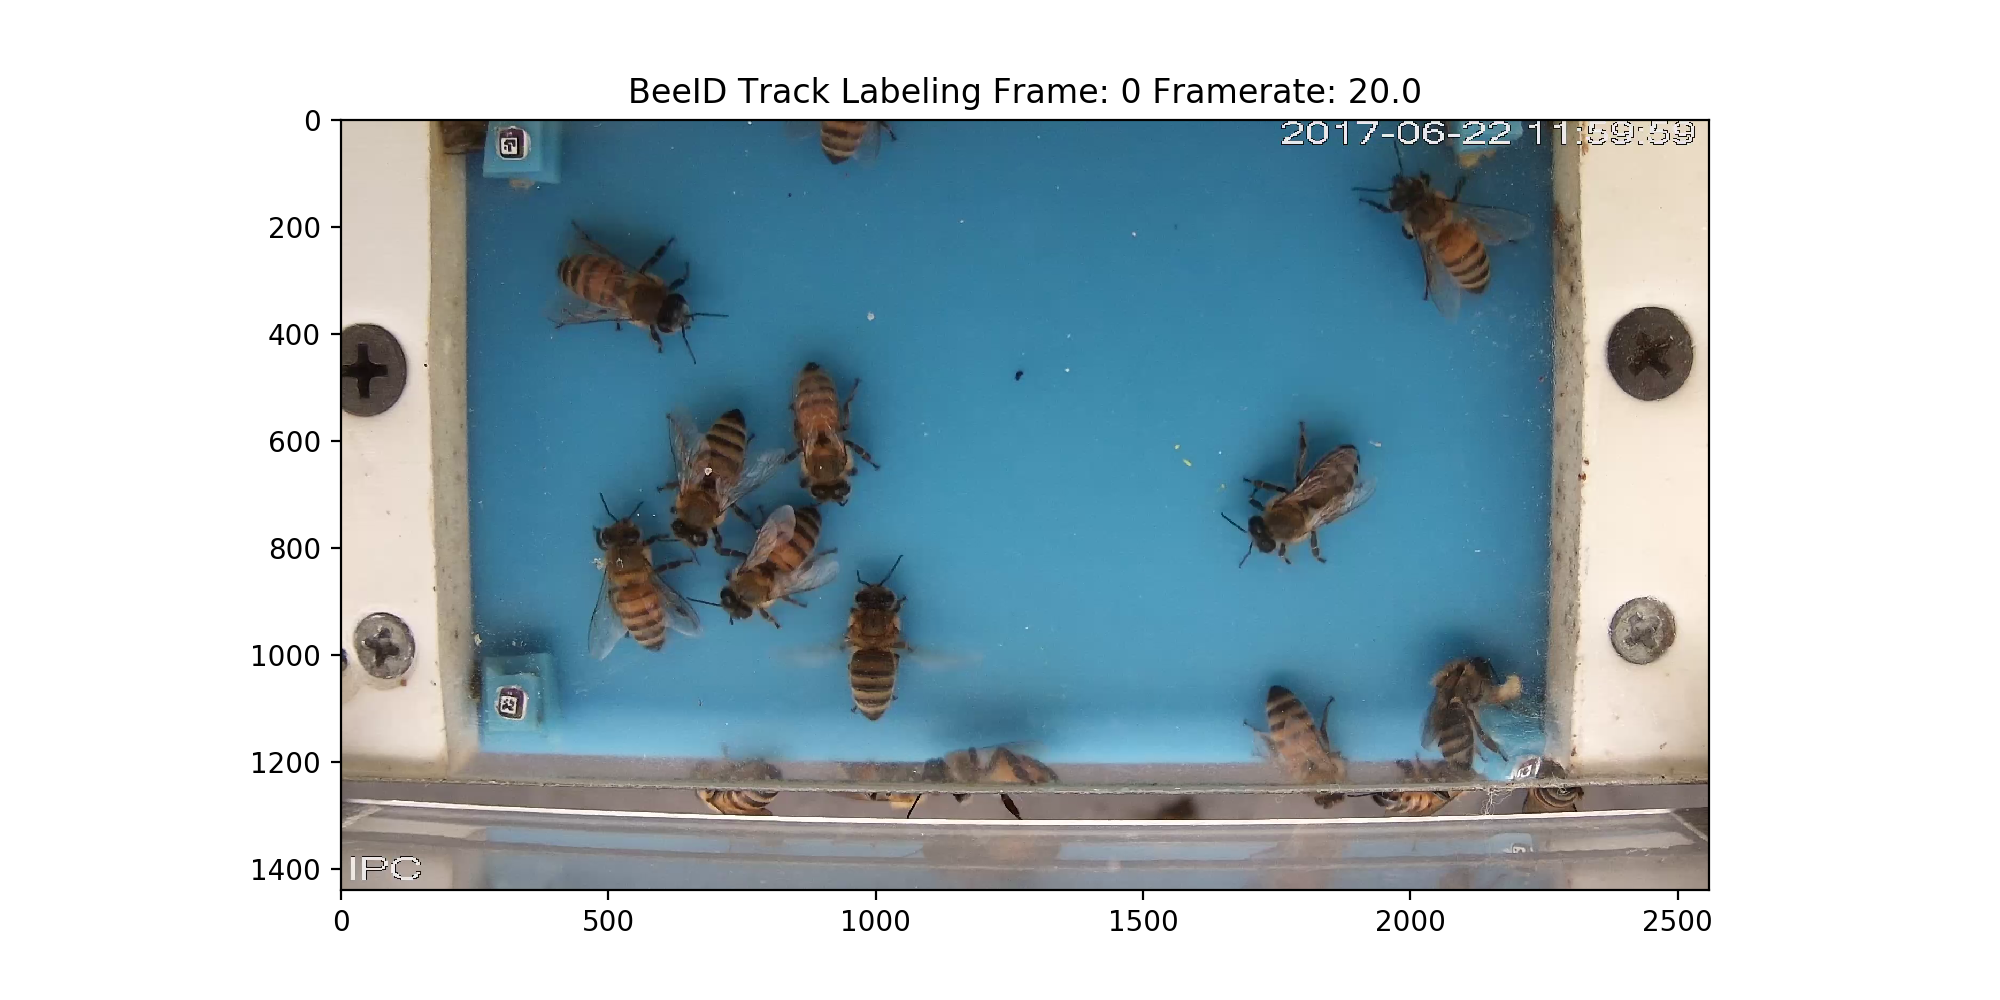

In [229]:
track = Track()
view = View(video="/Volumes/Extreme SSD/C02_170622120000.mp4",frame_number=0)

gui = GUI(track=track,view=view)

gui.start()


In [224]:
gui.text.value

'1'

In [16]:
master[track.id] = track.trajectory

In [222]:
track.trajectory

[{'x': 999.6233766233768, 'y': 953.3831168831169, 'frame': 0, 'bee_id': None}]

In [18]:
def add_to_master(master_dt,new_track):
    master_dt[new_track.id] = new_track.trajectories
    

In [ ]:
add_to_master(master,track)

In [25]:


df = pd.DataFrame.from_dict(master)

df.to_csv("Trajectories.csv",index=False)
